## 합성곱 신경망의 구성요소

### 합성곱: 밀집층과 비슷하게 입력과 가중치를 곱하고 절편을 더하는 선형 계산 하지만 밀집층과 달리 각 합성곱은 입력 전체가 아니라 일부만 사용하여 선형 계산을 수행한다.
### 필터  :밀집층의 뉴런에 해당함. 필터의 가중치와 절편을 종종 커널이라고 부름. 자주 사용되는 커널의 크기는 (3,3),(5,5) 커널의 깊이는 입력의 깊이와 동일함.
### 특성 맵: 합성곱층이나 풀링층의 출력 배열을 의미함. 필터하나가 하나의 특성 맵을 만듬. 합성곱층에서 5개의 필터를 적용하면 5개의 특성 맵이 만들어짐.
### 패딩 : 합성곱층의 입력 주위에 추가한 0 으로 채워진 픽셀 패딩을 사용하지 않는것은 밸리드 패딩이라고함. 합성곱 층의 출력 크기를 입력과 동일하게 만들기 위해 입력에 패딩을 추가하는 것을 세임패딩이라고함.
### 스트라이드: 합성곱층에서 필터가 입력 위를 이동하는 크기. 일반적으로 스트라이드는 1픽셀을 사용.
### 풀링 : 가중치가 없고 특성 맵의 가로세로 크기를 줄이는 역할을 수행 대표적으로 최대풀링과 평균 풀링이 있으며 (2,2)풀링으로  입력을 절반으로 줄임

## 합성곱 신경망을 사용한 이미지분류

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) /255.0
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [17]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 47s 30ms/step - loss: 0.5183 - accuracy: 0.8128 - val_loss: 0.3584 - val_accuracy: 0.8661
Epoch 2/20
1500/1500 [==============================] - 49s 33ms/step - loss: 0.3398 - accuracy: 0.8791 - val_loss: 0.2717 - val_accuracy: 0.9004
Epoch 3/20
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2916 - accuracy: 0.8943 - val_loss: 0.2573 - val_accuracy: 0.9057
Epoch 4/20
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2592 - accuracy: 0.9060 - val_loss: 0.2366 - val_accuracy: 0.9108
Epoch 5/20
1500/1500 [==============================] - 52s 34ms/step - loss: 0.2347 - accuracy: 0.9118 - val_loss: 0.2300 - val_accuracy: 0.9161
Epoch 6/20
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2138 - accuracy: 0.9212 - val_loss: 0.2278 - val_accuracy: 0.9196
Epoch 7/20
1500/1500 [==============================] - 50s 34ms/step - loss: 0.1976 - accuracy: 0.9271 - val_loss: 0.2398 -

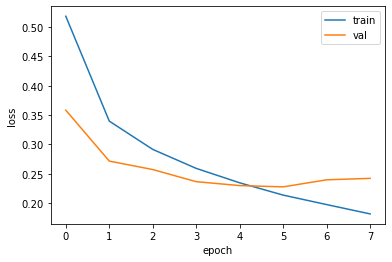

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [21]:
model.evaluate(val_scaled,val_target)


375/375 [==============================] - 3s 9ms/step - loss: 0.2278 - accuracy: 0.9196


[0.22779138386249542, 0.9195833206176758]

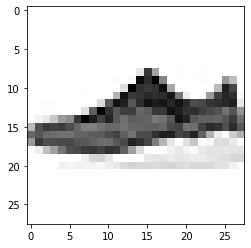

In [33]:
plt.imshow(val_scaled[2].reshape(28,28),cmap='gray_r')
plt.show()

In [37]:
pred=model.predict(val_scaled[2:3])
print(pred)

1/1 [==============================] - 0s 22ms/step
[[5.6235789e-13 3.9731872e-15 3.4258626e-13 7.0782755e-14 2.4308194e-14
  1.2159823e-06 9.0060575e-15 9.9999857e-01 6.8613444e-12 2.4478919e-07]]


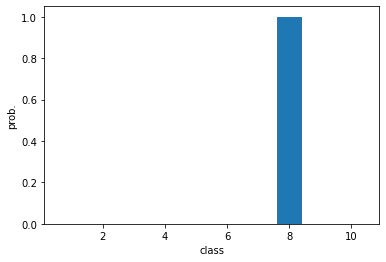

In [38]:
plt.bar(range(1,11), pred[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [39]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 2s 7ms/step - loss: 0.2556 - accuracy: 0.9079


[0.25559869408607483, 0.9078999757766724]

## 합성곱 신경망의 시각화

In [40]:
from tensorflow import keras
model=keras.models.load_model('best-cnn-model.h5')

In [41]:
model.layers

In [43]:
conv=model.layers[0]
conv.weights[0].shape,conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [44]:
conv_weights = conv.weights[0].numpy()
conv_weights.mean(),conv_weights.std()

(-0.023404025, 0.24866901)

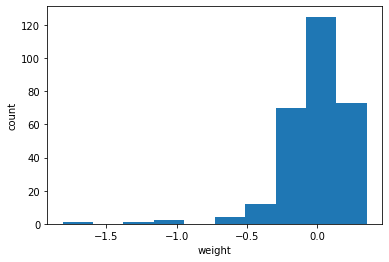

In [45]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()


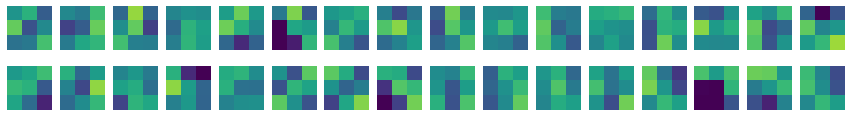

In [46]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [47]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

In [48]:
no_training_conv=no_training_model.layers[0]
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [49]:
no_training_weights = no_training_conv.weights[0].numpy()
no_training_weights.mean(),no_training_weights.std()

(0.0041118828, 0.08075301)

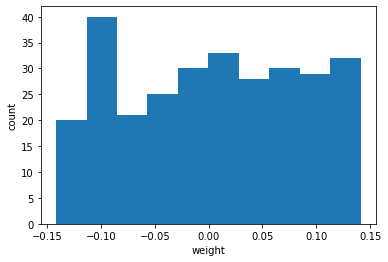

In [50]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

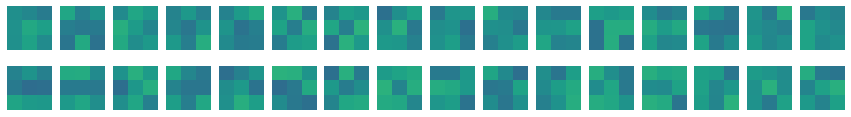

In [51]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [54]:
conv_acti=keras.Model(model.input,model.layers[0].output)

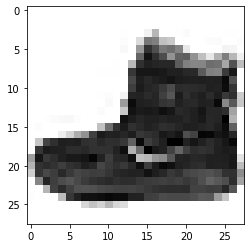

In [55]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [56]:
inputs=train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps= conv_acti.predict(inputs)

1/1 [==============================] - 0s 41ms/step


In [57]:
feature_maps.shape

(1, 28, 28, 32)

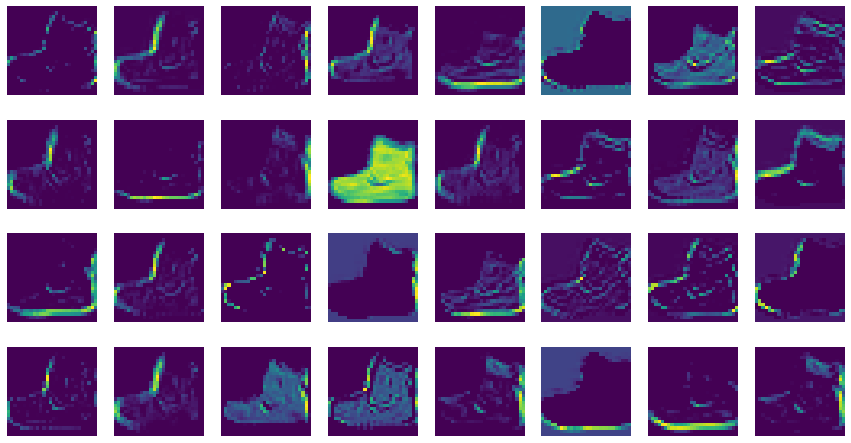

In [58]:
fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [59]:
conv2_acti=keras.Model(model.input,model.layers[2].output)
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv2_acti.predict(inputs)

1/1 [==============================] - 0s 63ms/step


In [60]:
feature_maps.shape

(1, 14, 14, 64)

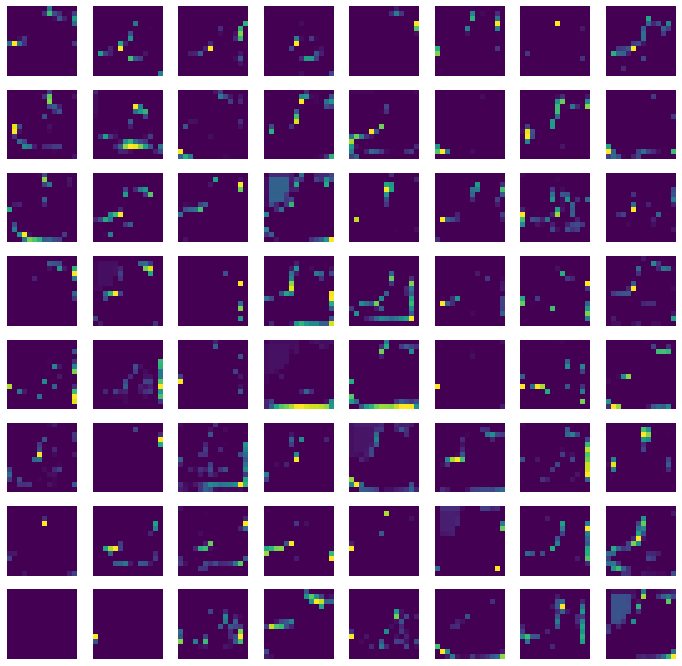

In [62]:
fig,axs=plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()